<a href="https://colab.research.google.com/github/Meet200/-Algorithms-in-python/blob/master/Linear_Regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# this model is about data set ex1data1 and here alpha rate and number of iters is more important to decide.


In [1]:
# Linear regression on ex1data1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/"My Drive/Colab Notebooks/Linear regression"

/content/drive/My Drive/Colab Notebooks/Linear regression


In [5]:
columnname = ['x','y']
dataset = pd.read_csv("ex1data1.txt",names=columnname)
print(dataset)
dataset.shape

          x         y
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
..      ...       ...
92   5.8707   7.20290
93   5.3054   1.98690
94   8.2934   0.14454
95  13.3940   9.05510
96   5.4369   0.61705

[97 rows x 2 columns]


(97, 2)

In [6]:
dataf = pd.DataFrame(dataset)
dataf.describe()

,x,y
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [7]:
x_value = dataf.iloc[0:97,0:1]
y_value = dataf.iloc[0:97,1:2]

In [8]:
y_value

,y
0,17.59200
1,9.13020
2,13.66200
3,11.85400
4,6.82330
...,...
92,7.20290
93,1.98690
94,0.14454
95,9.05510


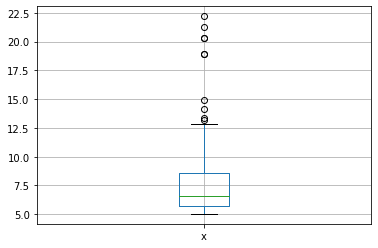

In [9]:
x_box=x_value.boxplot(column=['x'])

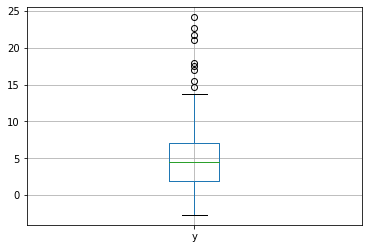

In [10]:
y_box=y_value.boxplot(column=['y'])

Text(0.5, 1.0, '1st LR Scatter plot ')

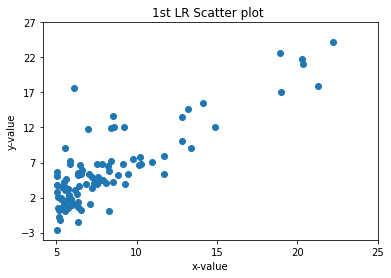

In [11]:
import matplotlib.pyplot as plt
plt.scatter(x_value,y_value)
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-3,30,step=5))
plt.xlabel("x-value")
plt.ylabel("y-value")
plt.title("1st LR Scatter plot ")

In [12]:
#define hypothesis  H(x) = theta_array[0]+theta_array[1]*x
def hypothesis(theta_array,x):  #theta_array =[theta_array[0],theta_araay[1]]
  return theta_array[0] + theta_array[1]*x


In [13]:
def cost_function(theta_array, x_value, y_value, m):
    # This function returns our cost function value at particular theta values
    total_error = 0
    for i in range(m):
        total_error += (theta_array[0] + theta_array[1]*x_value[i] - y_value[i])**2
    return total_error/(2*m)

In [14]:
def gradient_descent(theta_array,x,y,alpha,m):
    summation_theta0 = 0
    summation_theta1 = 0

    for i in range(m):
        summation_theta0+=((theta_array[0]+theta_array[1]*x[i]) - y[i])
        summation_theta1+=(((theta_array[0]+theta_array[1]*x[i]) - y[i])*x[i])

    new_theta0 = theta_array[0]-alpha*(summation_theta0/m)
    new_theta1 = theta_array[1]-alpha*(summation_theta1/m)

    updated_theta_array = [new_theta0,new_theta1]
    print(updated_theta_array)
    return updated_theta_array

In [15]:
def training(x,y,alpha,iters):
    theta_0 = 0
    theta_1 = 0
    theta_array = [theta_0,theta_1]

    m=x.size                #size of the data set or the number of observation
    cost_function_values = []
    for i in range(iters):
        theta_array = gradient_descent(theta_array,x,y,alpha,m)     #taking the new theta's
        cost_function_values.append(cost_function(theta_array,x,y,m))   #taking all the cost function values and storing
        if(i%6==0):
            y_new=x*theta_array[1]+theta_array[0]       #linear regression line
            plt.plot(x,y_new,'r')
            plt.scatter(x,y)
            plt.show()

    x=np.arange(0,len(cost_function_values),step=1)
    plt.plot(x,cost_function_values,"-b")
    plt.xlabel("number of iteration")
    plt.ylabel("Cost/loss values")
    plt.title("cost Function curve")
    plt.show()
    return theta_array

In [16]:
training_data=pd.read_csv("ex1data1.txt",names=columnname)
cleaning_data = training_data.dropna()   # drops the observation for not a number
cleaning_data

,x,y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [17]:
x_train=cleaning_data['x']
y_train=cleaning_data['y']

In [18]:
x_value = x_train.values.reshape(x_train.size)
x_value.shape

(97,)

In [19]:
y_value = y_train.values.reshape(y_train.size)
y_value.shape

(97,)

[0.03503481030927834, 0.39197309847334033]


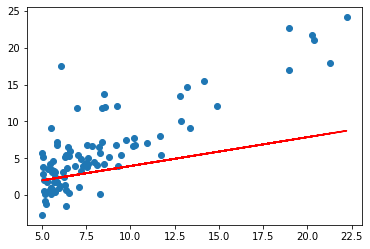

[0.050668879223164445, 0.5907820005002493]
[0.056475698451012205, 0.6917225063153247]
[0.05730575072739376, 0.7430769862463855]
[0.05561656897806821, 0.7693080849262686]
[0.05265327920518995, 0.7828099947749981]
[0.049046731867046986, 0.7898623315511724]


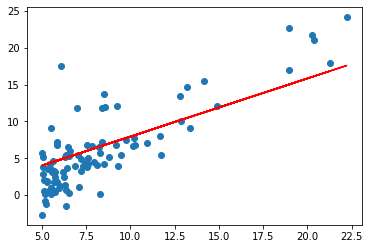

[0.04511654986717552, 0.7936467124390276]
[0.04102467021229095, 0.7957751291689069]
[0.036853137106340875, 0.7970643103337501]
[0.032643516436213174, 0.7979280581746399]
[0.028416865432313688, 0.7985760291128794]
[0.024183850454866516, 0.7991144474770479]


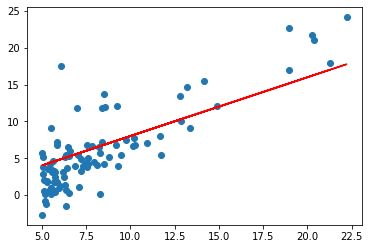

[0.019949873250276376, 0.7995971329085074]
[0.015717668209412037, 0.8000513537995496]
[0.01148861828903253, 0.8004909261420886]
[0.0072634217337714, 0.8009228501628403]
[0.003042429876094657, 0.8013506728269691]
[-0.0011741817146845778, 0.8017761914771272]


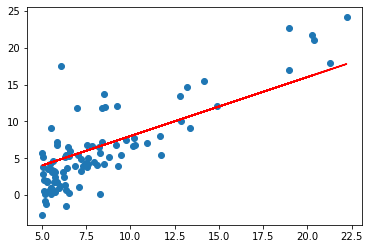

[-0.005386326518408492, 0.8022003169956329]
[-0.009593963129745482, 0.8026235111324082]
[-0.013797072998518001, 0.8030460080806344]
[-0.01799564915166671, 0.8034679267398086]
[-0.0221896904791473, 0.8038893275947077]
[-0.026379198838837836, 0.8043102415335663]


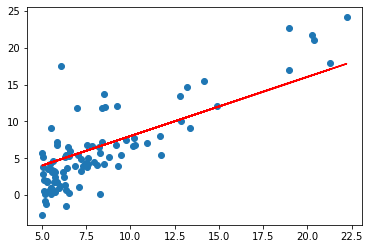

[-0.030564177589720024, 0.8047306844490343]
[-0.034744630848706735, 0.8051506646358667]
[-0.038920563114110615, 0.8055701865390235]
[-0.04309197907487434, 0.8059892526526726]
[-0.04725888351391841, 0.8064078644823366]
[-0.05142128125917437, 0.8068260230323713]


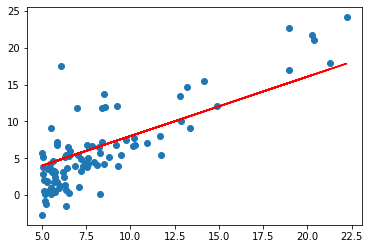

[-0.055579177158778234, 0.8072437290529508]
[-0.05973257606850482, 0.8076609831652058]
[-0.06388148284540413, 0.8080777859246248]
[-0.06802590234457986, 0.8084941378531776]
[-0.07216583941756019, 0.808910039455592]
[-0.07630129891147491, 0.8093254912275998]


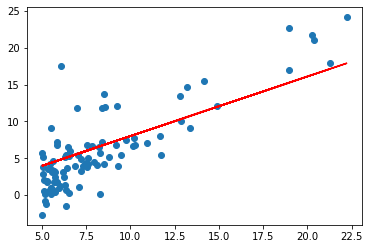

[-0.08043228566864152, 0.8097404936601151]
[-0.08455880452635817, 0.8101550472413523]
[-0.08868086031680159, 0.8105691524578984]
[-0.09279845786697818, 0.8109828097952574]
[-0.09691160199870201, 0.8113960197381263]
[-0.10102029752858642, 0.8118087827705345]


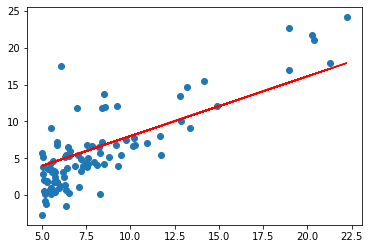

[-0.1051245492680426, 0.8122210993759159]
[-0.10922436202328159, 0.8126329700371447]
[-0.11331974059531812, 0.8130443952365541]
[-0.11741068977997526, 0.8134553754559465]
[-0.12149721436788966, 0.8138659111765982]
[-0.1255793191445168, 0.8142760028792626]


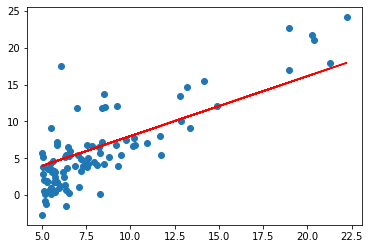

[-0.1296570088901366, 0.814685651044172]
[-0.13373028837985884, 0.8150948561510386]
[-0.1377991623836288, 0.8155036186790553]
[-0.1418636356662328, 0.815911939106897]
[-0.1459237129873038, 0.8163198179127203]
[-0.14997939910132693, 0.8167272555741651]


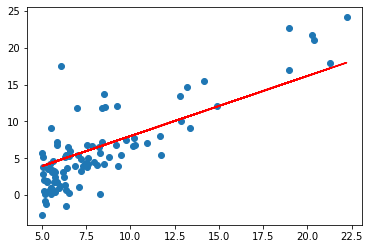

[-0.15403069875764505, 0.8171342525683544]
[-0.15807761670046439, 0.8175408093718949]
[-0.16212015766885998, 0.8179469264608784]
[-0.16615832639678133, 0.8183526043108813]
[-0.17019212761305785, 0.8187578433969659]
[-0.17422156604140454, 0.8191626441936806]


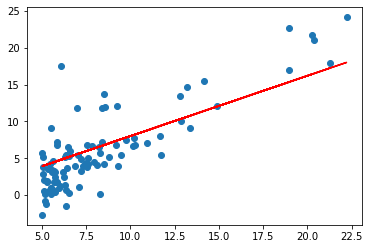

[-0.17824664640042734, 0.8195670071750604]
[-0.18226737340362878, 0.819970932814628]
[-0.18628375175941347, 0.8203744215853935]
[-0.1902957861710936, 0.8207774739598559]
[-0.19430348133689448, 0.8211800904100026]
[-0.19830684194996, 0.821582271407311]


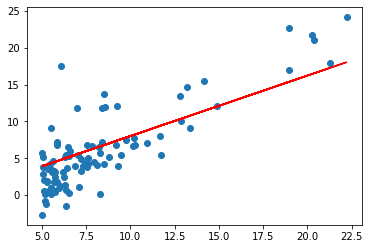

[-0.20230587269835815, 0.8219840174227482]
[-0.2063005782650865, 0.8223853289267722]
[-0.21029096332807767, 0.8227862063893321]
[-0.2142770325602049, 0.8231866502798687]
[-0.21825879062928735, 0.8235866610673152]
[-0.22223624219809576, 0.8239862392200972]


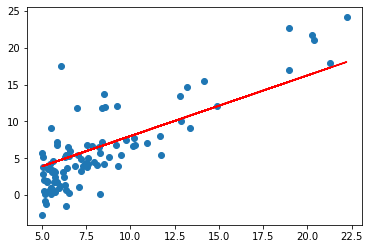

[-0.22620939192435774, 0.824385385206134]
[-0.23017824446076332, 0.824784099492839]
[-0.2341428044549704, 0.8251823825471198]
[-0.23810307654961016, 0.8255802348353789]
[-0.2420590653822925, 0.8259776568235146]
[-0.24601077558561146, 0.8263746489769214]


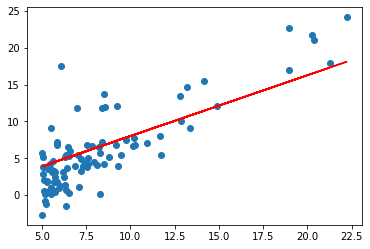

[-0.24995821178715075, 0.82677121176049]
[-0.25390137860948897, 0.8271673456386086]
[-0.2578402806702052, 0.8275630510751633]
[-0.26177492258188434, 0.827958328533538]
[-0.26570530895212247, 0.828353178476616]
[-0.2696314443835323, 0.8287476013667795]


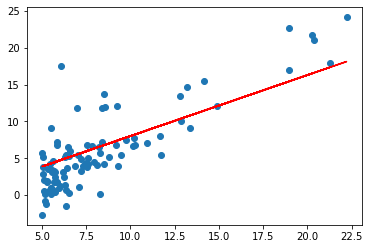

[-0.27355333347374866, 0.8291415976659108]
[-0.2774709808154336, 0.8295351678353926]
[-0.28138439099628204, 0.8299283123361088]
[-0.2852935685990271, 0.8303210316284444]
[-0.28919851820144526, 0.8307133261722868]
[-0.293099244376362, 0.831105196427026]


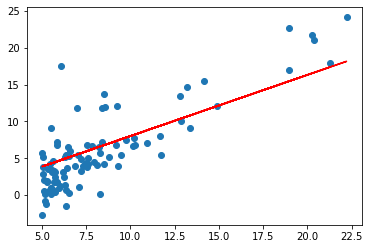

[-0.29699575169165693, 0.8314966428515549]
[-0.30088804471026936, 0.8318876659042704]
[-0.30477612799020337, 0.8322782660430734]
[-0.3086600060845334, 0.8326684437253696]
[-0.3125396835414095, 0.83305819940807]
[-0.3164151649040625, 0.8334475335475914]


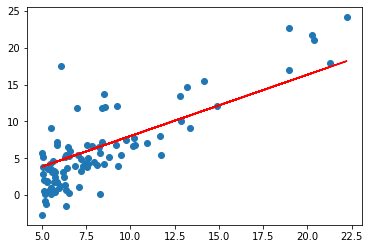

[-0.32028645471080963, 0.8338364465998569]
[-0.3241535574950595, 0.8342249390202968]
[-0.3280164777853177, 0.8346130112638485]
[-0.33187522010519194, 0.8350006637849574]
[-0.3357297889733974, 0.8353878970375774]
[-0.339580188903762, 0.8357747114751717]


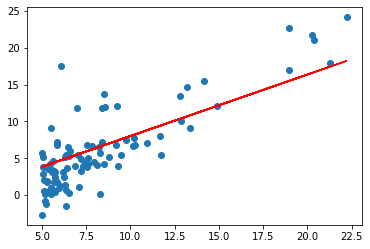

[-0.34342642440523174, 0.8361611075507127]
[-0.34726849998187587, 0.836547085716683]
[-0.35110642013289217, 0.8369326464250758]
[-0.35494018935261246, 0.8373177901273956]
[-0.35876981213050757, 0.8377025172746583]
[-0.3625952929511927, 0.8380868283173921]


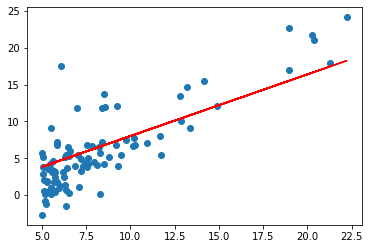

[-0.3664166362944327, 0.8384707237056382]
[-0.37023384663514736, 0.8388542038889507]
[-0.37404692844341647, 0.8392372693163976]
[-0.3778558861844853, 0.8396199204365612]
[-0.3816607243187695, 0.8400021576975387]
[-0.3854614473018608, 0.8403839815469425]


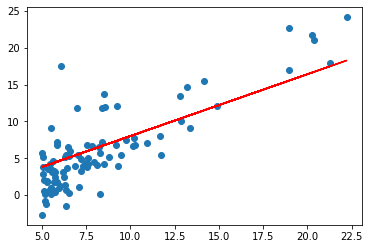

[-0.38925805958453175, 0.8407653924319011]
[-0.39305056561274115, 0.8411463907990592]
[-0.39683896982763933, 0.8415269770945786]
[-0.4006232766655732, 0.8419071517641384]
[-0.4044034905580915, 0.8422869152529359]
[-0.40817961593195, 0.8426662680056864]


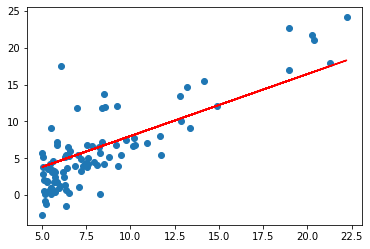

[-0.41195165720911675, 0.843045210466625]
[-0.4157196188067771, 0.8434237430795054]
[-0.41948350513733895, 0.8438018662876022]
[-0.42324332060843806, 0.84417958053371]
[-0.4269990696229429, 0.8445568862601449]
[-0.43075075657896006, 0.8449337839087442]


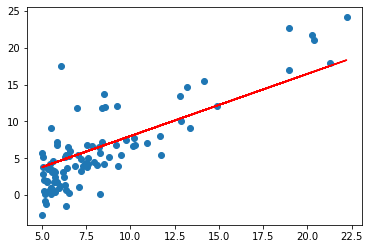

[-0.43449838586983935, 0.8453102739208677]
[-0.43824196188417897, 0.8456863567373977]
[-0.44198148900583045, 0.8460620327987395]
[-0.44571697161390406, 0.8464373025448223]
[-0.44944841408277375, 0.8468121664150994]
[-0.45317582078208235, 0.8471866248485488]


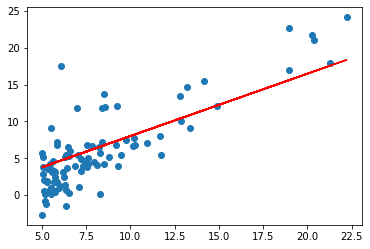

[-0.4568991960767466, 0.8475606782836738]
[-0.46061854432696253, 0.8479343271585034]
[-0.4643338698882101, 0.8483075719105927]
[-0.4680451771112588, 0.8486804129770237]
[-0.47175247034217244, 0.8490528507944057]
[-0.4754557539223142, 0.8494248857988758]


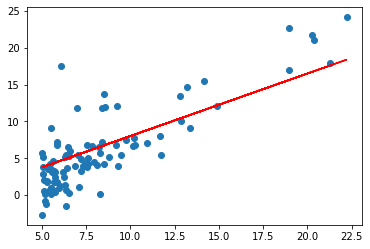

[-0.479155032188352, 0.8497965184260992]
[-0.4828503094722632, 0.85016774911127]
[-0.4865415901013401, 0.8505385782891117]
[-0.4902288783981947, 0.8509090063938776]
[-0.49391217868076376, 0.8512790338593512]
[-0.49759149526231405, 0.8516486611188471]


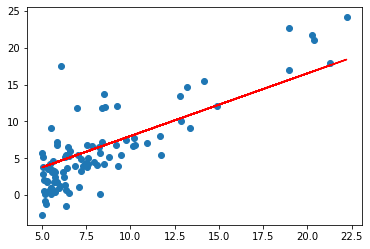

[-0.5012668324514472, 0.8520178886052109]
[-0.504938194552105, 0.8523867167508203]
[-0.5086055858635741, 0.8527551459875853]
[-0.5122690106804912, 0.8531231767469486]
[-0.5159284732928484, 0.8534908094598865]
[-0.5195839779859976, 0.8538580445569093]


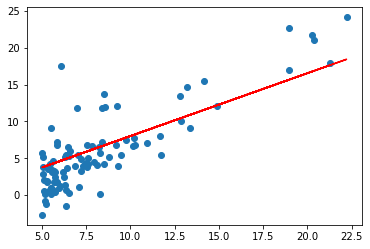

[-0.5232355290406561, 0.8542248824680613]
[-0.526883130732911, 0.8545913236229218]
[-0.5305267873342251, 0.8549573684506055]
[-0.5341665031114409, 0.8553230173797632]
[-0.5378022823267862, 0.8556882708385819]
[-0.541434129237879, 0.8560531292547854]


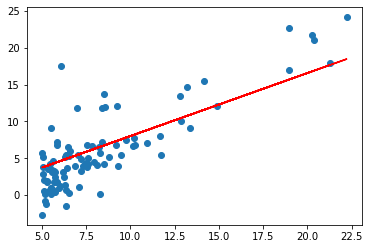

[-0.5450620480977326, 0.856417593055635]
[-0.5486860431547601, 0.85678166266793]
[-0.5523061186527799, 0.8571453385180079]
[-0.5559222788310203, 0.8575086210317452]
[-0.5595345279241248, 0.8578715106345578]
[-0.5631428701621569, 0.8582340077514014]


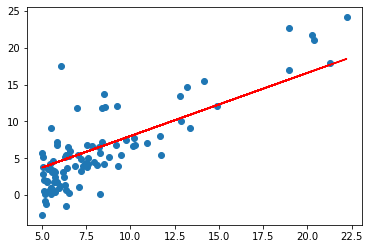

[-0.566747309770605, 0.8585961128067722]
[-0.5703478509703872, 0.8589578262247072]
[-0.5739444979778567, 0.8593191484287848]
[-0.5775372550048065, 0.8596800798421251]
[-0.5811261262584739, 0.8600406208873911]
[-0.5847111159415463, 0.8604007719867881]


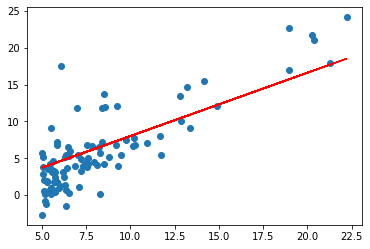

[-0.5882922282521654, 0.860760533562065]
[-0.5918694673839325, 0.8611199060345146]
[-0.5954428375259132, 0.8614788898249739]
[-0.5990123428626423, 0.8618374853538248]
[-0.602577987574129, 0.8621956930409945]
[-0.6061397758358613, 0.8625535133059563]


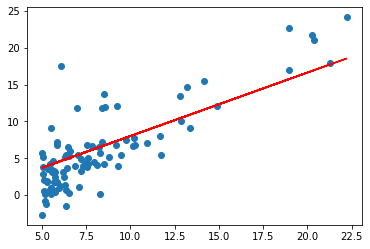

[-0.6096977118188115, 0.8629109465677295]
[-0.6132517996894404, 0.8632679932448801]
[-0.6168020436097029, 0.8636246537555219]
[-0.6203484477370522, 0.863980928517316]
[-0.6238910162244451, 0.864336817947472]
[-0.6274297532203468, 0.8646923224627482]


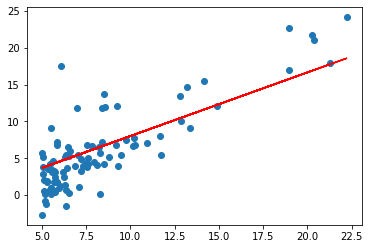

[-0.6309646628687355, 0.8650474424794522]
[-0.6344957493091078, 0.8654021784134412]
[-0.6380230166764828, 0.8657565306801229]
[-0.6415464691014076, 0.8661104996944555]
[-0.6450661107099617, 0.8664640858709485]
[-0.6485819456237621, 0.8668172896236629]


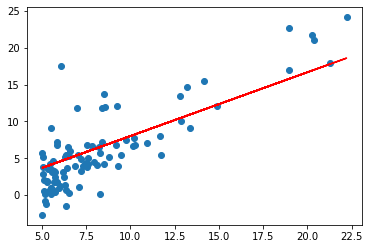

[-0.6520939779599682, 0.867170111366212]
[-0.6556022118312861, 0.8675225515117619]
[-0.659106651345974, 0.8678746104730316]
[-0.6626073006078469, 0.8682262886622939]
[-0.666104163716281, 0.8685775864913755]
[-0.669597244766219, 0.8689285043716579]


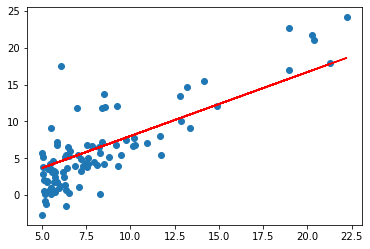

[-0.6730865478481745, 0.8692790427140775]
[-0.6765720770482371, 0.8696292019291264]
[-0.680053836448077, 0.8699789824268526]
[-0.68353183012495, 0.8703283846168605]
[-0.6870060621517019, 0.8706774089083118]
[-0.6904765365967735, 0.8710260557099256]


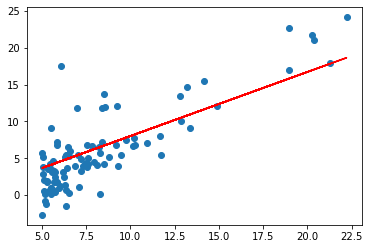

[-0.6939432575242057, 0.8713743254299788]
[-0.6974062289936434, 0.8717222184763068]
[-0.7008654550603409, 0.8720697352563038]
[-0.7043209397751669, 0.8724168761769237]
[-0.7077726871846083, 0.8727636416446797]
[-0.7112207013307759, 0.8731100320656457]


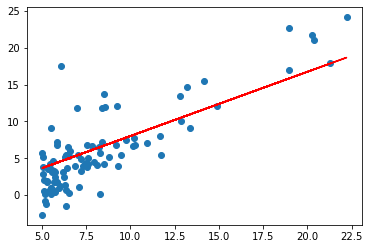

[-0.7146649862514084, 0.8734560478454566]
[-0.7181055459798777, 0.8738016893893082]
[-0.7215423845451934, 0.8741469571019582]
[-0.7249755059720072, 0.8744918513877267]
[-0.7284049142806183, 0.8748363726504961]
[-0.7318306134869773, 0.8751805212937124]


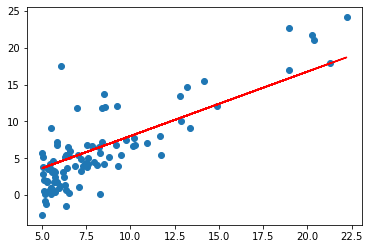

[-0.7352526076026917, 0.8755242977203849]
[-0.73867090063503, 0.8758677023330873]
[-0.7420854965869267, 0.8762107355339578]
[-0.7454963994569868, 0.8765533977246996]
[-0.7489036132394905, 0.8768956893065817]
[-0.7523071419243983, 0.8772376106804385]


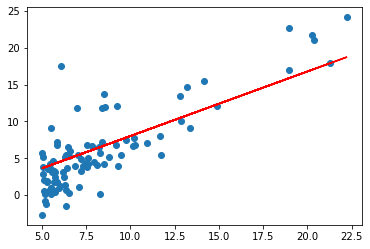

[-0.755706989497355, 0.8775791622466714]
[-0.7591031599396949, 0.8779203444052489]
[-0.762495657228446, 0.8782611575557062]
[-0.7658844853363354, 0.8786016020971471]
[-0.7692696482317928, 0.8789416784282433]
[-0.7726511498789563, 0.8792813869472355]


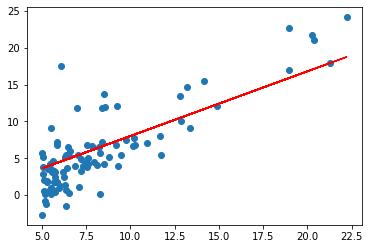

[-0.7760289942376766, 0.8796207280519335]
[-0.7794031852635211, 0.8799597021397171]
[-0.7827737269077797, 0.8802983096075363]
[-0.7861406231174681, 0.8806365508519116]
[-0.7895038778353335, 0.8809744262689346]
[-0.7928634949998586, 0.8813119362542687]


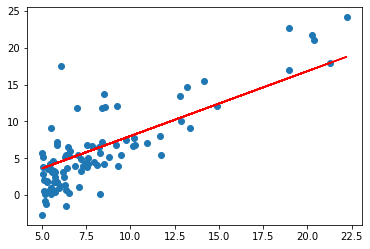

[-0.7962194785452666, 0.8816490812031493]
[-0.7995718324015254, 0.8819858615103843]
[-0.8029205604943525, 0.8823222775703545]
[-0.8062656667452195, 0.8826583297770144]
[-0.8096071550713567, 0.8829940185238923]
[-0.8129450293857577, 0.8833293442040907]


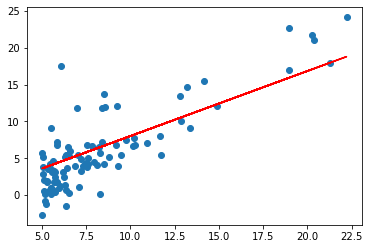

[-0.8162792935971841, 0.8836643072102871]
[-0.8196099516101697, 0.8839989079347345]
[-0.8229370073250254, 0.8843331467692612]
[-0.8262604646378438, 0.8846670241052721]
[-0.8295803274405036, 0.8850005403337484]
[-0.8328965996206741, 0.8853336958452489]


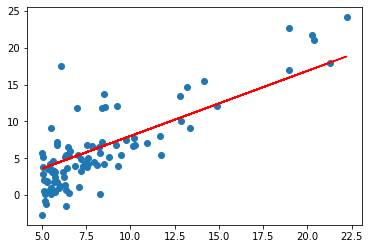

[-0.83620928506182, 0.8856664910299097]
[-0.8395183876432059, 0.8859989262774449]
[-0.8428239112399004, 0.8863310019771474]
[-0.8461258597227814, 0.8866627185178887]
[-0.84942423695854, 0.8869940762881198]
[-0.8527190468096851, 0.8873250756758717]


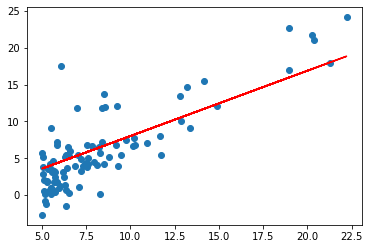

[-0.8560102931345486, 0.8876557170687558]
[-0.8592979797872887, 0.8879860008539638]
[-0.8625821106178957, 0.8883159274182694]
[-0.8658626894721956, 0.8886454971480271]
[-0.8691397201918549, 0.8889747104291742]
[-0.8724132066143853, 0.8893035676472304]


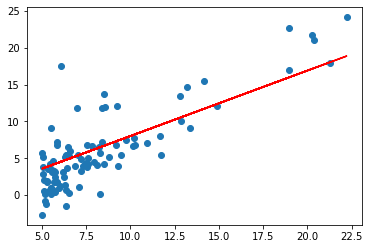

[-0.8756831525731478, 0.8896320691872984]
[-0.8789495618973576, 0.8899602154340643]
[-0.8822124384120884, 0.8902880067717983]
[-0.8854717859382767, 0.890615443584355]
[-0.8887276082927263, 0.8909425262551736]
[-0.8919799092881134, 0.8912692551672787]


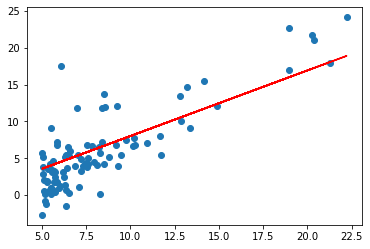

[-0.8952286927329902, 0.891595630703281]
[-0.8984739624317897, 0.8919216532453768]
[-0.9017157221848303, 0.8922473231753493]
[-0.9049539757883203, 0.8925726408745689]
[-0.9081887270343618, 0.8928976067239933]
[-0.9114199797109559, 0.8932222211041685]


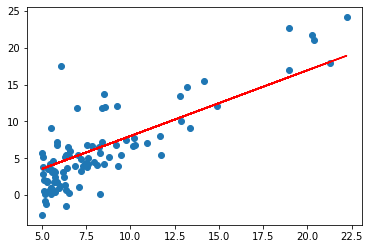

[-0.9146477376020066, 0.8935464843952285]
[-0.9178720044873253, 0.8938703969768964]
[-0.9210927841426355, 0.8941939592284847]
[-0.9243100803395768, 0.8945171715288953]
[-0.9275238968457099, 0.8948400342566206]
[-0.9307342374245203, 0.8951625477897437]


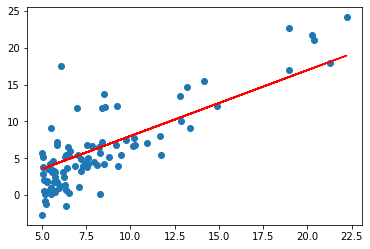

[-0.9339411058354233, 0.8954847125059384]
[-0.9371445058337682, 0.8958065287824705]
[-0.9403444411708425, 0.8961279969961974]
[-0.9435409155938765, 0.896449117523569]
[-0.9467339328460478, 0.8967698907406282]
[-0.9499234966664855, 0.8970903170230109]


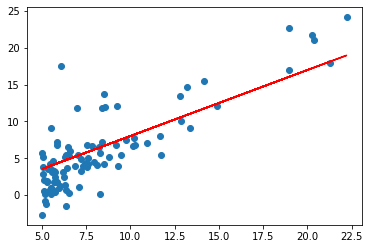

[-0.9531096107902743, 0.8974103967459471]
[-0.9562922789484598, 0.8977301302842607]
[-0.9594715048680518, 0.8980495180123702]
[-0.9626472922720292, 0.8983685603042892]
[-0.9658196448793442, 0.8986872575336269]
[-0.9689885664049271, 0.8990056100735883]


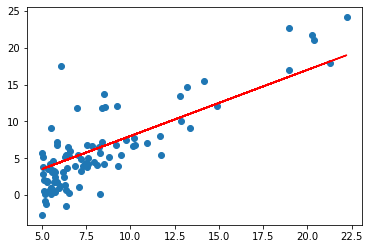

[-0.97215406055969, 0.8993236182969747]
[-0.9753161310505314, 0.8996412825761844]
[-0.9784747815803407, 0.8999586032832128]
[-0.9816300158480025, 0.9002755807896528]
[-0.9847818375484005, 0.9005922154666955]
[-0.9879302503724227, 0.900908507685131]


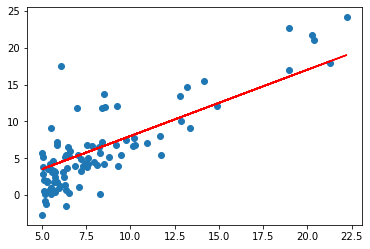

[-0.9910752580069646, 0.9012244578153477]
[-0.9942168641349345, 0.9015400662273337]
[-0.9973550724352573, 0.9018553332906769]
[-1.000489886582879, 0.9021702593745656]
[-1.003621310248771, 0.9024848448477886]
[-1.006749347099934, 0.9027990900787358]


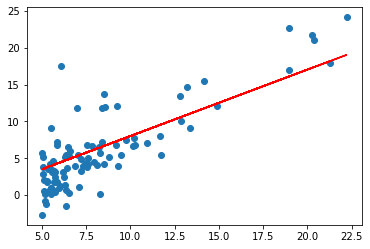

[-1.009874000799403, 0.903112995435399]
[-1.0129952750062508, 0.9034265612853717]
[-1.0161131733755933, 0.9037397879958498]
[-1.0192276995585925, 0.9040526759336323]
[-1.022338857202462, 0.9043652254651212]
[-1.0254466499504706, 0.9046774369563225]


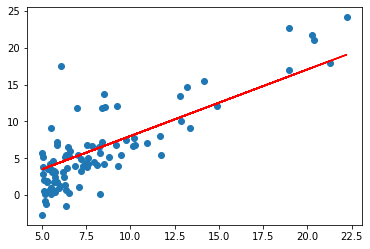

[-1.0285510814419467, 0.9049893107728462]
[-1.0316521553122824, 0.9053008472799068]
[-1.0347498751929378, 0.9056120468423239]
[-1.0378442447114458, 0.9059229098245225]
[-1.0409352674914156, 0.9062334365905335]
[-1.0440229471525373, 0.906543627503994]


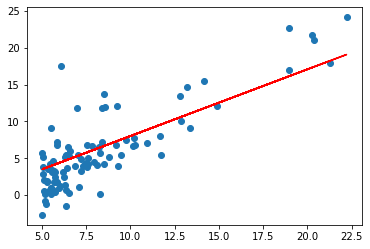

[-1.0471072873105862, 0.9068534829281478]
[-1.050188291577427, 0.907163003225846]
[-1.0532659635610175, 0.907472188759547]
[-1.056340306865414, 0.9077810398913174]
[-1.0594113250907742, 0.9080895569828321]
[-1.0624790218333622, 0.9083977403953749]


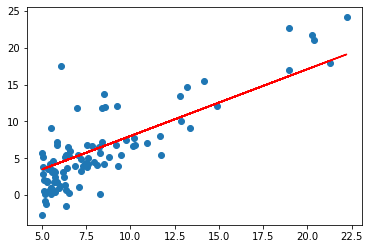

[-1.0655434006855526, 0.9087055904898386]
[-1.0686044652358349, 0.9090131076267259]
[-1.0716622190688168, 0.9093202921661498]
[-1.0747166657652296, 0.9096271444678333]
[-1.0777678089019316, 0.9099336648911108]
[-1.0808156520519125, 0.9102398537949279]


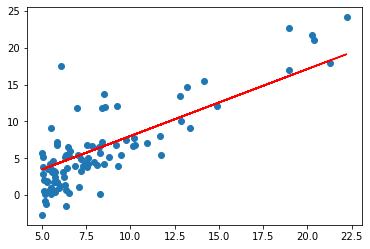

[-1.0838601987842977, 0.9105457115378418]
[-1.0869014526643526, 0.9108512384780221]
[-1.089939417253486, 0.9111564349732509]
[-1.0929740961092551, 0.9114613013809237]
[-1.0960054927853695, 0.9117658380580489]
[-1.0990336108316954, 0.9120700453612491]


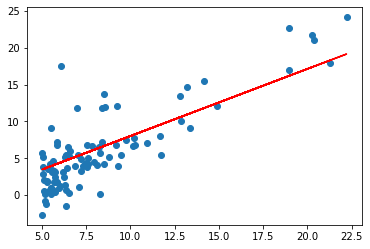

[-1.1020584537942593, 0.9123739236467613]
[-1.1050800252152524, 0.9126774732704368]
[-1.1080983286330353, 0.9129806945877423]
[-1.111113367582141, 0.9132835879537602]
[-1.1141251455932804, 0.9135861537231885]
[-1.117133666193345, 0.9138883922503419]


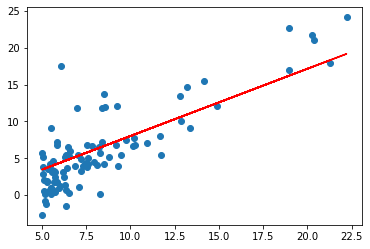

[-1.1201389329054128, 0.9141903038891517]
[-1.12314094924875, 0.9144918889931662]
[-1.1261397187388178, 0.9147931479155519]
[-1.1291352448872745, 0.9150940810090927]
[-1.1321275312019805, 0.9153946886261916]
[-1.1351165811870023, 0.9156949711188697]


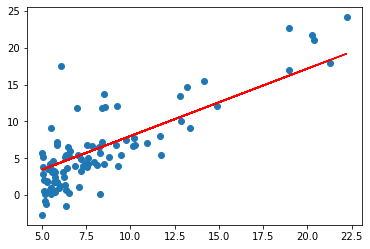

[-1.1381023983426164, 0.9159949288387678]
[-1.1410849861653138, 0.9162945621371464]
[-1.1440643481478037, 0.9165938713648862]
[-1.1470404877790177, 0.916892856872488]
[-1.150013408544114, 0.9171915190100739]
[-1.1529831139244815, 0.917489858127387]


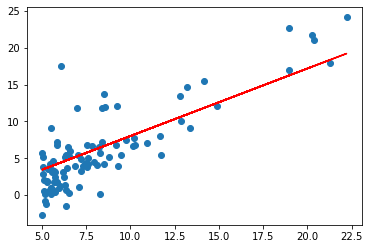

[-1.1559496073977433, 0.9177878745737924]
[-1.1589128924377619, 0.9180855686982773]
[-1.1618729725146422, 0.9183829408494512]
[-1.1648298510947361, 0.9186799913755468]
[-1.1677835316406464, 0.9189767206244203]
[-1.170734017611231, 0.9192731289435513]


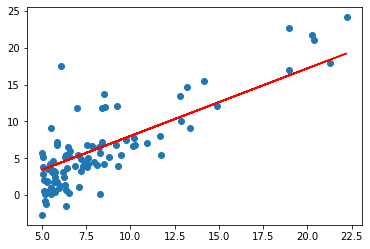

[-1.1736813124616068, 0.9195692166800438]
[-1.1766254196431538, 0.9198649841806263]
[-1.179566342603519, 0.9201604317916525]
[-1.1825040847866206, 0.9204555598591013]
[-1.1854386496326523, 0.9207503687285774]
[-1.1883700405780868, 0.9210448587453118]


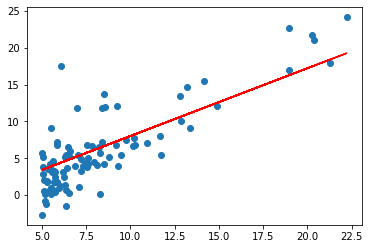

[-1.19129826105568, 0.9213390302541621]
[-1.194223314494475, 0.9216328835996127]
[-1.1971452043198065, 0.9219264191257759]
[-1.2000639339533044, 0.9222196371763913]
[-1.2029795068128977, 0.922512538094827]
[-1.205891926312819, 0.9228051222240798]


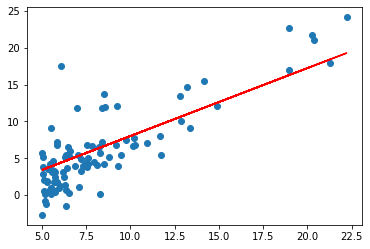

[-1.208801195863608, 0.9230973899067754]
[-1.211707318872116, 0.9233893414851687]
[-1.214610298741509, 0.923680977301145]
[-1.217510138871273, 0.9239722976962192]
[-1.2204068426572168, 0.9242633030115375]
[-1.2233004134914764, 0.9245539935878765]


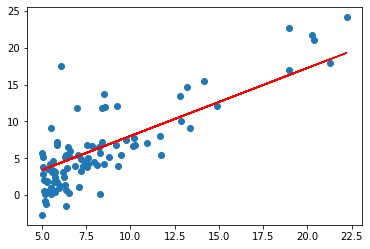

[-1.2261908547625193, 0.9248443697656445]
[-1.229078169855148, 0.9251344318848819]
[-1.2319623621505045, 0.9254241802852607]
[-1.234843435026073, 0.9257136153060861]
[-1.237721391855686, 0.926002737286296]
[-1.2405962360095257, 0.926291546564462]


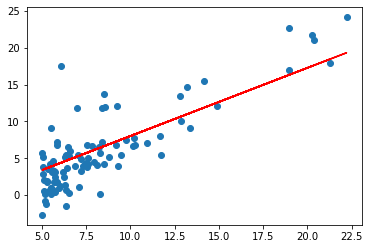

[-1.2434679708541303, 0.9265800434787891]
[-1.2463365997523965, 0.9268682283671169]
[-1.2492021260635837, 0.9271561015669194]
[-1.2520645531433183, 0.9274436634153057]
[-1.2549238843435973, 0.9277309142490202]
[-1.2577801230127923, 0.9280178544044433]


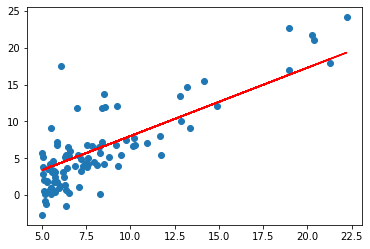

[-1.2606332724956535, 0.9283044842175913]
[-1.2634833361333133, 0.9285908040241171]
[-1.266330317263291, 0.9288768141593109]
[-1.2691742192194957, 0.9291625149581]
[-1.272015045332231, 0.9294479067550494]
[-1.2748527989281984, 0.9297329898843625]


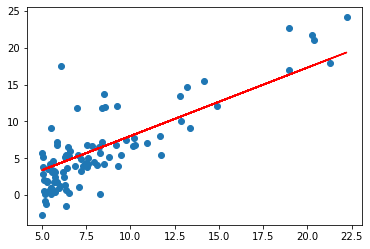

[-1.2776874833305014, 0.9300177646798811]
[-1.2805191018586495, 0.9303022314750857]
[-1.2833476578285616, 0.9305863906030966]
[-1.2861731545525708, 0.9308702423966734]
[-1.2889955953394272, 0.9311537871882161]
[-1.2918149834943027, 0.9314370253097649]


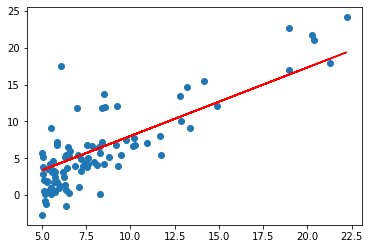

[-1.2946313223187942, 0.931719957093001]
[-1.2974446151109278, 0.9320025828692471]
[-1.3002548651651629, 0.9322849029694672]
[-1.3030620757723952, 0.9325669177242676]
[-1.3058662502199614, 0.9328486274638969]
[-1.3086673917916427, 0.9331300325182464]


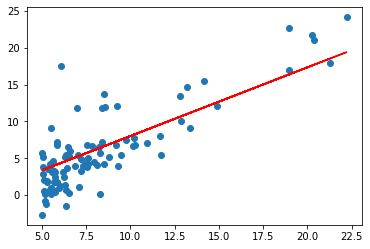

[-1.3114655037676688, 0.933411133216851]
[-1.3142605894247217, 0.9336919298888887]
[-1.3170526520359391, 0.9339724228631818]
[-1.319841694870919, 0.934252612468197]
[-1.3226277211957231, 0.9345324990320455]
[-1.3254107342728805, 0.9348120828824836]


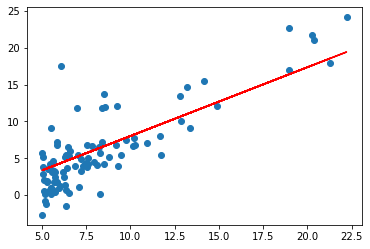

[-1.3281907373613917, 0.9350913643469134]
[-1.3309677337167327, 0.9353703437523828]
[-1.3337417265908582, 0.9356490214255859]
[-1.3365127192322057, 0.9359273976928635]
[-1.3392807148856996, 0.9362054728802034]
[-1.3420457167927542, 0.9364832473132408]


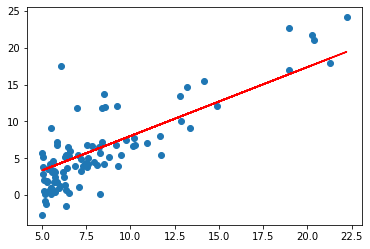

[-1.344807728191279, 0.936760721317259]
[-1.3475667523156802, 0.9370378952171889]
[-1.350322792396867, 0.9373147693376106]
[-1.3530758516622536, 0.9375913440027528]
[-1.3558259333357638, 0.9378676195364937]
[-1.3585730406378342, 0.9381435962623609]


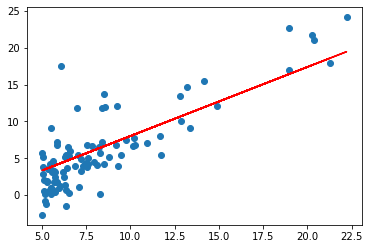

[-1.3613171767854186, 0.9384192745035325]
[-1.3640583449919914, 0.9386946545828367]
[-1.3667965484675513, 0.9389697368227528]
[-1.3695317904186255, 0.939244521545411]
[-1.3722640740482728, 0.9395190090725938]
[-1.3749934025560882, 0.9397931997257347]


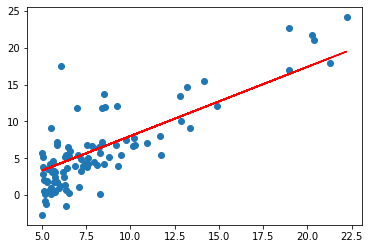

[-1.3777197791382056, 0.9400670938259204]
[-1.3804432069873025, 0.9403406916938897]
[-1.3831636892926031, 0.9406139936500348]
[-1.3858812292398826, 0.9408870000144016]
[-1.38859583001147, 0.9411597111066894]
[-1.391307494786253, 0.941432127246252]


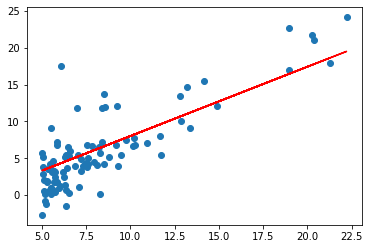

[-1.394016226739681, 0.9417042487520977]
[-1.3967220290437687, 0.9419760759428898]
[-1.3994249048671006, 0.9422476091369469]
[-1.4021248573748335, 0.9425188486522434]
[-1.4048218897287017, 0.9427897948064099]
[-1.4075160050870192, 0.9430604479167332]


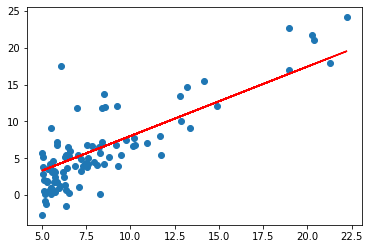

[-1.4102072066046845, 0.9433308083001569]
[-1.4128954974331838, 0.9436008762732824]
[-1.4155808807205947, 0.9438706521523679]
[-1.4182633596115901, 0.94414013625333]
[-1.4209429372474418, 0.9444093288917436]
[-1.423619616766024, 0.9446782303828419]


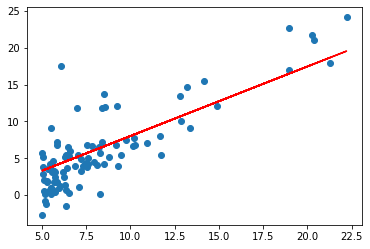

[-1.426293401301817, 0.9449468410415179]
[-1.428964293985911, 0.9452151611823233]
[-1.4316322979460103, 0.94548319111947]
[-1.434297416306436, 0.9457509311668298]
[-1.4369596521881296, 0.9460183816379354]
[-1.4396190087086578, 0.9462855428459799]


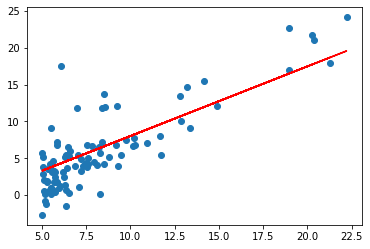

[-1.4422754889822151, 0.946552415103818]
[-1.4449290961196284, 0.9468189987239661]
[-1.4475798332283591, 0.9470852940186024]
[-1.4502277034125086, 0.9473513012995675]
[-1.4528727097728205, 0.9476170208783647]
[-1.4555148554066848, 0.9478824530661605]


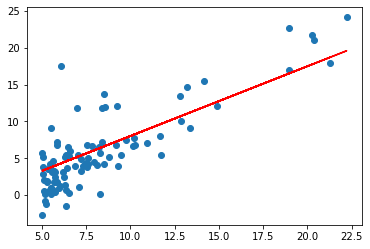

[-1.458154143408142, 0.9481475981737847]
[-1.4607905768678855, 0.9484124565117311]
[-1.4634241588732664, 0.9486770283901577]
[-1.4660548925082966, 0.9489413141188866]
[-1.4686827808536522, 0.9492053140074055]
[-1.4713078269866777, 0.9494690283648668]


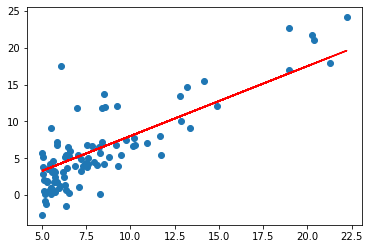

[-1.4739300339813892, 0.949732457500089]
[-1.476549404908478, 0.9499956017215561]
[-1.479165942835314, 0.9502584613374186]
[-1.4817796508259502, 0.9505210366554943]
[-1.4843905319411252, 0.950783327983267]
[-1.4869985892382673, 0.9510453356278891]


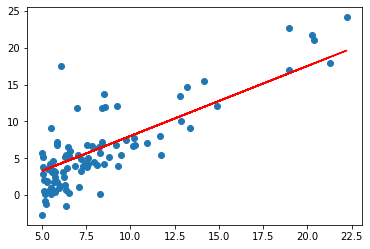

[-1.489603825771498, 0.9513070598961799]
[-1.4922062445916358, 0.9515685010946273]
[-1.4948058487461993, 0.9518296595293876]
[-1.497402641279411, 0.952090535506286]
[-1.4999966252322015, 0.9523511293308169]
[-1.5025878036422116, 0.9526114413081443]


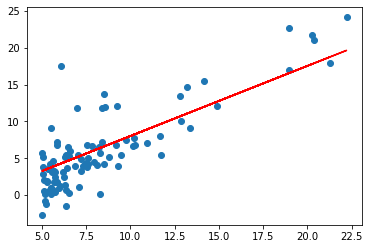

[-1.505176179543797, 0.9528714717431022]
[-1.507761755968032, 0.9531312209401948]
[-1.5103445359427123, 0.9533906892035969]
[-1.5129245224923589, 0.9536498768371547]
[-1.5155017186382214, 0.9539087841443854]
[-1.518076127398282, 0.9541674114284779]


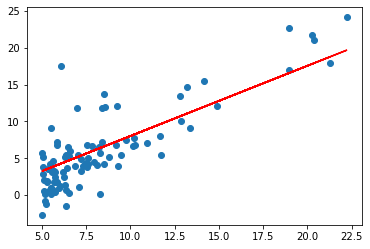

[-1.5206477517872585, 0.9544257589922936]
[-1.5232165948166085, 0.954683827138366]
[-1.5257826594945323, 0.9549416161689012]
[-1.5283459488259767, 0.9551991263857789]
[-1.5309064658126386, 0.955456358090552]
[-1.5334642134529681, 0.9557133115844475]


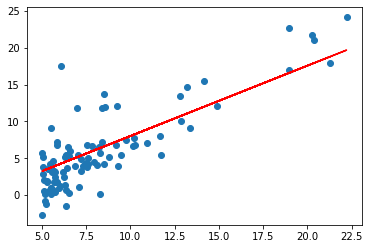

[-1.5360191947421726, 0.9559699871683665]
[-1.5385714126722199, 0.9562263851428843]
[-1.5411208702318417, 0.9564825058082517]
[-1.5436675704065375, 0.9567383494643944]
[-1.5462115161785772, 0.9569939164109138]
[-1.548752710527006, 0.9572492069470873]


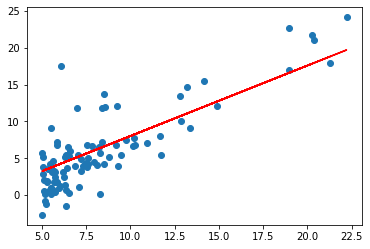

[-1.5512911564276466, 0.9575042213718685]
[-1.5538268568531033, 0.9577589599838879]
[-1.5563598147727655, 0.9580134230814528]
[-1.5588900331528108, 0.9582676109625479]
[-1.5614175149562088, 0.9585215239248356]
[-1.5639422631427244, 0.9587751622656564]


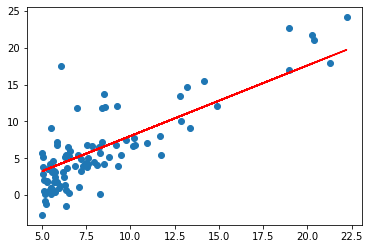

[-1.5664642806689215, 0.9590285262820292]
[-1.5689835704881663, 0.9592816162706517]
[-1.5715001355506306, 0.9595344325279006]
[-1.5740139788032954, 0.9597869753498323]
[-1.5765251031899548, 0.9600392450321826]
[-1.5790335116512182, 0.9602912418703679]


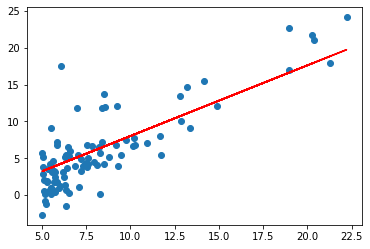

[-1.5815392071245156, 0.9605429661594845]


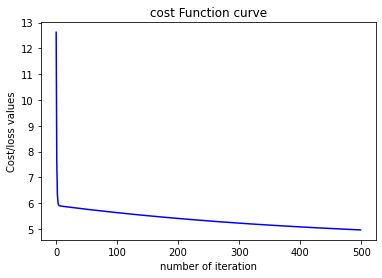

In [20]:
alpha=0.006
iter=500
#training(x_value,y_value,alpha,iter)
theta_array=training(x_value,y_value,alpha,iter)

In [21]:
theta_array

[-1.5815392071245156, 0.9605429661594845]

In [22]:
hypothesis(theta_array,17.0)

14.747691217586722

In [23]:

cost_function(theta_array,x_value,y_value,len(x_value))
#5.8302772693609946 for iters=170  alpha = 0.001
#5.782352755262624  for iters = 270   "
#5.777654655635943 for iters = 280    "
#5.678468473590414 for iters = 500    "
#5.060967967597758 for iters=500     alpha=0.005
#5.176426102019587 for iters=500     alpha=0.004
#4.964552493845446 for iters=500      alpha = 0.006

4.964552493845446

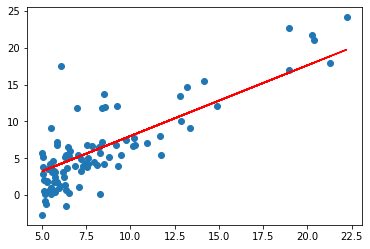

In [24]:
ynew=x_value*theta_array[1]+theta_array[0]
plt.plot(x_value,ynew,'r')
plt.scatter(x_value,y_value)



In [25]:
SSTO = []   # total sum of squares
SSR = []    # regression sum of squares
SSE = []    # error sum of squares
y_mean = np.mean(y_train)

In [26]:
m=x_train.size
for i in range(m):
  prediction = hypothesis(theta_array, x_train[i])  # value of prediction (value of hypothesis at point i)
  y_i = y_train[i]                             # value of 'y' at point i
  SSE.append((prediction - y_i)**2)           # sum of values in the array is SSE (error sum of squares)
  SSR.append((prediction - y_mean)**2)        # sum of values in the array is SSR (regression sum of squares)
  SSTO.append((y_i - y_mean)**2)              # sum of values in the array is SSTO (total sum of squares)

In [27]:


print('\naverage error is : ', sum(SSE)/len(SSE))
print('\nsum of squares of error (SSE) : ', sum(SSE))
print('\nregression sum of squares (SSR) : ', sum(SSR))
print('\ntotal sum of squares (SSTO) : ', sum(SSTO))
print('\nThe Coefficient Of Determination R-squared is : ', (sum(SSR)/sum(SSTO))*100,'%')       #regression coefficient




average error is :  9.929104987690891

sum of squares of error (SSE) :  963.1231838060164

regression sum of squares (SSR) :  1343.3602392638393

total sum of squares (SSTO) :  2914.8470516572247

The Coefficient Of Determination R-squared is :  46.08681743695873 %
